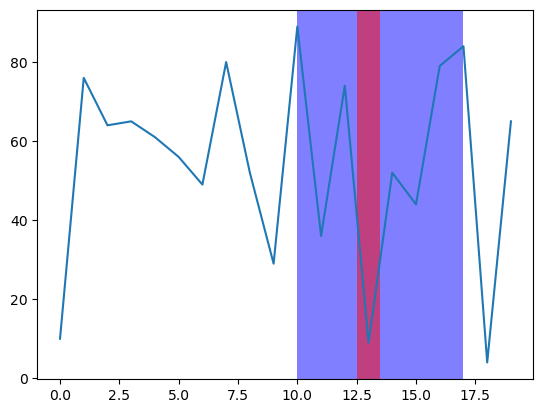

In [5]:
import numpy as np
import matplotlib.pyplot as plt
    
numbers = np.random.randint(1, 100, 20)

sorted_numbers = np.sort(numbers, kind='quicksort')[::-1]

lake = np.empty((0,4))

def minimal_element(left, right):
    min = left
    while left<right:
        if numbers[min]>numbers[left]:
            min=left
        
        left+=1
    return min

def find_minimum(a, b):
    if numbers[a] < numbers[b]:
        return a
    else:
        return b

def func( left, right):
    global lake  
    j= left + 1
    min_element = 0
    flag= True
    
    while j < right:
        if numbers[j] >= numbers[left] or numbers[j] >= numbers[right]:
            func(left,j)
            func(j,right)
            flag= False
            
        j+=1
            
    if flag:
        min_element = minimal_element(left, right)
        
        h = numbers[find_minimum(left, right)] - numbers[min_element]
        
        new_row = np.array([left, right, h, min_element])
        lake = np.vstack((lake, new_row))
    
        
i=0

while i < len(numbers)-1:
    k = 0
    left_border, right_border = 0 , 0
    while k < len(numbers):
        if numbers[k] == sorted_numbers[i] or numbers[k] == sorted_numbers[i+1]:
            if left_border == 0:
                left_border = k
            else:
                right_border = k
                left=0
                right=0
                
                if left_border > right_border:
                    left = right_border
                    right = left_border
                else:
                    left = left_border
                    right = right_border
                
                func(left,right)      
                    
                        
                    
                
        
        k+=1
        
    
    i+=1

row_index = np.argmax(lake[:, 2])
row_with_max_value = lake[row_index, :]

plt.plot (numbers)

plt.axvspan(row_with_max_value[0], row_with_max_value[1], facecolor='blue', alpha=0.5)
plt.axvspan(row_with_max_value[3]-0.5, row_with_max_value[3]+0.5, facecolor='red', alpha=0.5)
